# Exploration of Retinal Cells with AngioTool

### What do we want?

We want to know the effects of DEE mutations on blood vessel formation.

### How?

We want to determine if there are statistically significant differences in 

- Vessel density ("Vessels percentage area")
- Branch points ("Junctions density")
- Vessel length ("Total Vessels Length")
- Total number of end points

### Experimental setup
- Handful of litters with DEE/DEE, DEE/+, +/+
    - Variation between litters is a potential problem because we have a small sample size.
- Four images per animal

### Statistics plan
Our goal is to run a [paired t-test](http://www.biostathandbook.com/pairedttest.html) (mathematically equivalent to "two-way ANOVA without replication"). It is more powerful than a two-sample t-test since it controls for variation between litters.

Note: After calculating differences for each pair, it's a one-sample t-test to see whether the mean difference is equal to zero. 


### Load data


In [3]:
import numpy as np
import pandas as pd

unblinded_file = '../UnblindedAngioToolDataP7.csv'
df = pd.read_csv(unblinded_file)

#df
df.head() # Look at first five rows

,Total Number of End Points,Litter,AnimalID,Animal,Type,Vessel Density,Vessel Length,Junction Density,Total Number of Junctions
0,65,42,42-2,2,mut,43.987,15.046,142.171,118
1,50,42,42-2,2,mut,39.556,13.303,131.985,109
2,43,42,42-2,2,mut,39.675,12.120,109.754,89
3,46,42,42-2,2,mut,38.355,14.567,141.146,116
4,42,42,42-2,2,mut,49.424,15.450,172.670,143


### Average over Litter and Genotype

We have multiple images per litter/genotype, and a paired t-test requires one value for each combination. 


1. Pivot by `Genotype` and `Litter` using `set_index()`.

2. Make sure the genotype ordering is consistent for all litters by using `sort_index()`.

3. Calculate mean values within litters for each genotype

In [4]:
df.groupby(["AnimalID","Type"]).mean()

,,Total Number of End Points,Litter,Animal,Vessel Density,Vessel Length,Junction Density,Total Number of Junctions
AnimalID,Type,,,,,,,
42-2,mut,46.714286,42.0,2.0,43.418857,14.185857,141.655714,116.714286
42-3,mut,53.500000,42.0,3.0,49.400875,15.945250,176.975500,146.375000
42-4,wt,59.000000,42.0,4.0,52.661500,17.782250,237.280250,196.750000
42-5,wt,55.000000,42.0,5.0,50.440000,16.018429,193.293714,159.714286
42-6,wt,56.750000,42.0,6.0,49.136750,16.868250,213.869125,177.125000
43-0,wt,57.500000,43.0,0.0,45.834125,16.054875,192.089375,159.375000
43-1,wt,54.250000,43.0,1.0,44.501875,16.382125,198.915000,164.375000
43-2,mut,65.250000,43.0,2.0,44.530250,16.521500,204.706500,169.250000
43-3,wt,51.000000,43.0,3.0,45.577750,16.487000,202.908500,168.000000


In [5]:
data_mean = (df
             .set_index(['Litter',  'Type']) # pivot
             .sort_index(level = ['Litter', 'Type'])
             .mean(level = ['Litter', 'Type'])
            )
data_mean

Total Number of End Points    Animal  Vessel Density  \
Litter Type                                                         
42     mut                    50.333333  2.533333       46.609267   
       wt                     56.578947  5.210526       50.358947   
43     mut                    60.700000  5.200000       46.703300   
       wt                     56.120000  2.600000       45.315120   
44     het                    62.285714  3.000000       49.073571   
       mut                    69.428571  4.000000       43.898000   
       wt                     56.250000  1.500000       46.786688   
47     het                    58.391304  6.304348       50.686348   
       mut                    57.541667  2.000000       52.976042   
       wt                     53.750000  5.000000       48.229625   

             Vessel Length  Junction Density  Total Number of Junctions  
Litter Type                                                              
42     mut       15.124200        160.492933                 132.533333  
       wt        16.747579        211.217368                 174.842105  
43     mut       16.633850        209.429800                 173.250000  
       wt        16.146160        194.234120                 160.680000  
44     het       16.393000        191.406429                 158.857143  
       mut       16.130286        192.570286                 158.714286  
       wt        15.629187        183.250687                 151.250000  
47     het       18.070522        238.613696                 198.260870  
       mut       17.710958        225.702250                 187.541667  
       wt        17.353000        222.021375                 184.625000

### Split data

`data_mean` is a `MultiIndex` object instead of your usual `DataFrame`

In [6]:
data_mean.index

MultiIndex(levels=[[42, 43, 44, 47], ['het', 'mut', 'wt']],
           labels=[[0, 0, 1, 1, 2, 2, 2, 3, 3, 3], [1, 2, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Litter', 'Type'])

We will use `panda`'s cross-section function, `DataFrame.xs`, to separate our data by genotype.

| Wild type | Mutant  |
|-----------|---------|
| +/+       | DEE/DEE |

In [7]:
wild =   data_mean.xs('wt',     level = 'Type')
mutant = data_mean.xs('mut', level = 'Type')

In [8]:
wild

,Total Number of End Points,Animal,Vessel Density,Vessel Length,Junction Density,Total Number of Junctions
Litter,,,,,,
42,56.578947,5.210526,50.358947,16.747579,211.217368,174.842105
43,56.120000,2.600000,45.315120,16.146160,194.234120,160.680000
44,56.250000,1.500000,46.786688,15.629187,183.250687,151.250000
47,53.750000,5.000000,48.229625,17.353000,222.021375,184.625000


In [9]:
mutant

,Total Number of End Points,Animal,Vessel Density,Vessel Length,Junction Density,Total Number of Junctions
Litter,,,,,,
42,50.333333,2.533333,46.609267,15.124200,160.492933,132.533333
43,60.700000,5.200000,46.703300,16.633850,209.429800,173.250000
44,69.428571,4.000000,43.898000,16.130286,192.570286,158.714286
47,57.541667,2.000000,52.976042,17.710958,225.702250,187.541667


In [10]:
## Get parameter data arrays
wildVPA =           wild['Vessel Density'].values
wildJunctions =     wild['Junction Density'].values
wildVesselsLength = wild['Vessel Length'].values
wildNEndPoints =    wild['Total Number of End Points'].values

mutantVPA =           mutant['Vessel Density'].values
mutantJunctions =     mutant['Junction Density'].values
mutantVesselsLength = mutant['Vessel Length'].values
mutantNEndPoints =    mutant['Total Number of End Points'].values

## Paired dot plots

These plots show how the pairing was done

In [11]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

def pair_dot_plot(befores, afters, ylabel):
    
    # plotting the points
    plt.scatter(np.zeros(len(befores)), befores)
    plt.scatter(np.ones(len(afters)), afters)

    # plotting the lines
    for i in range(len(befores)):
        plt.plot( [0,1], [befores[i], afters[i]], c='k')

    plt.xticks([0,1], ['+/+', 'mutant'])
    plt.xlim([-0.5, 1.5])
    plt.ylabel(ylabel)

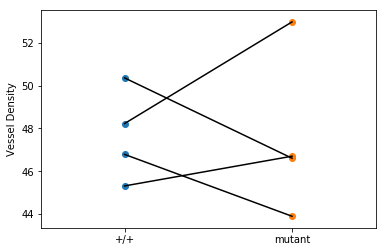

In [12]:
pair_dot_plot(wildVPA, mutantVPA, 'Vessel Density')

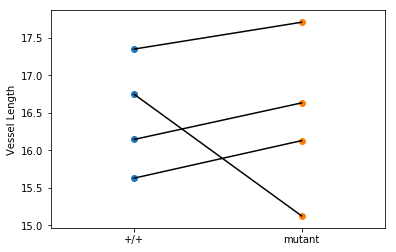

In [13]:
pair_dot_plot(wildVesselsLength, mutantVesselsLength, 'Vessel Length')

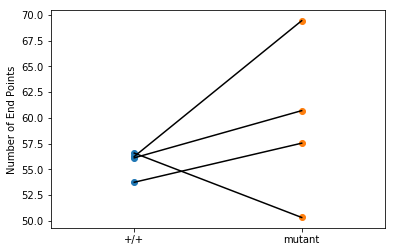

In [14]:
pair_dot_plot(wildNEndPoints, mutantNEndPoints, 'Number of End Points')

## Hypothesis testing

Now that we have our data ready to go, we can do a **paired t-test**.

`scipy` contains useful things for scientific analysis, and they have a built-in paired t-test function called `ttest_rel`.

In [15]:
from scipy import stats

## Do paired/dependent t-tests
t_VPA, p_VPA = stats.ttest_rel(wildVPA, mutantVPA)
t_junct, p_junct = stats.ttest_rel(wildJunctions, mutantJunctions)
t_vessel_length, p_vessel_length = stats.ttest_rel(wildVesselsLength, mutantVesselsLength)
t_n_endpoints, p_n_endpoints = stats.ttest_rel(wildNEndPoints, mutantNEndPoints)
t_statistics = [t_VPA, t_junct, t_vessel_length, t_n_endpoints]
p_values =     [p_VPA, p_junct, p_vessel_length, p_n_endpoints]

stat_df = pd.DataFrame({'Parameter': ["Vessel Density",
                                      "Total Number of Junctions",
                                      "Vessel Length",
                                      "Total Number of End Points",],
                        't_statistic': t_statistics, 
                        'p_value': p_values})

stat_df.set_index('Parameter', inplace=True)
stat_df

,p_value,t_statistic
Parameter,,
Vessel Density,0.953160,0.063776
Total Number of Junctions,0.735824,0.370203
Vessel Length,0.902444,0.133233
Total Number of End Points,0.406636,-0.962885


## Effect size
The Cohen d$_z$ values indicate that our effect sizes are on the order of 1.5$\sigma$.

There's some concern that Cohen's d is biased upwards for small samples (n < 20)

It appears that our p-values for 
- `Vessels percentage area` 
- `Junctions density`
- `Total Vessels Length`

are statistically significant at the p < 0.05 level.

However, p-values by themselves aren't very useful. Sure, there's indication of a statistically significant result, but what sort of a difference does it make?

To answer this, we can look at **effect size**.

"Cohen's d" is frequently seen among literature, but there are a handful of techniques that are mistakenly attributed to be Cohen's d. For a good review, I recommend https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3840331/.

In this analysis, we will use Cohen's $d_z$, where the $z$ reminds us that we are looking at the difference of two samples ($x$ and $y$).



In [16]:
## Calculate Cohen's d using test statistic and n
## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3840331/
def get_cohens_d_z(t_statistic, n):
    """Returns Cohen's d_z
    
    One way of calculating Cohen's d is by 
    taking the t-statistic and dividing it by
    the square root of the sample size.
    """
    d = [t / np.sqrt(n)
         for t in t_statistic]
    
    return d

n = len(wildVPA)
cohens_d_values = get_cohens_d_z(t_statistics, n)

pd.options.display.float_format = '{:,.3f}'.format

stat_df['cohen_dz'] = cohens_d_values
stat_df

,p_value,t_statistic,cohen_dz
Parameter,,,
Vessel Density,0.953,0.064,0.032
Total Number of Junctions,0.736,0.370,0.185
Vessel Length,0.902,0.133,0.067
Total Number of End Points,0.407,-0.963,-0.481


For fun, we can calculate cohen's $d$ using means and stds. We expect calculating the effect size from the t-statistic to yield identical results.

First, we need to look at the difference in means (wild - mutant)

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

## Look at the difference in means
diff = wild - mutant
diff

,Total Number of End Points,Animal,Vessel Density,Vessel Length,Junction Density,Total Number of Junctions
Litter,,,,,,
42,6.25,2.68,3.75,1.62,50.72,42.31
43,-4.58,-2.60,-1.39,-0.49,-15.20,-12.57
44,-13.18,-2.50,2.89,-0.50,-9.32,-7.46
47,-3.79,3.00,-4.75,-0.36,-3.68,-2.92


Averaging through the litters will yield the mean difference

In [18]:
means = diff.mean()
means_df = pd.DataFrame(means, columns=['mean difference']) 
means_df

,mean difference
Total Number of End Points,-3.83
Animal,0.14
Vessel Density,0.13
Vessel Length,0.07
Junction Density,5.63
Total Number of Junctions,4.84


Standard deviation of the mean differences

In [19]:
stds = diff.std()
stds

Total Number of End Points    7.95
Animal                        3.11
Vessel Density                3.95
Vessel Length                 1.04
Junction Density             30.43
Total Number of Junctions    25.29
dtype: float64

In [20]:
summary_df = pd.concat([stat_df, means_df], axis=1)
summary_df

,p_value,t_statistic,cohen_dz,mean difference
Animal,nan,nan,nan,0.14
Junction Density,nan,nan,nan,5.63
Total Number of End Points,0.41,-0.96,-0.48,-3.83
Total Number of Junctions,0.74,0.37,0.19,4.84
Vessel Density,0.95,0.06,0.03,0.13
Vessel Length,0.90,0.13,0.07,0.07


In [21]:
means/stds

Total Number of End Points   -0.48
Animal                        0.05
Vessel Density                0.03
Vessel Length                 0.07
Junction Density              0.19
Total Number of Junctions     0.19
dtype: float64

In [22]:
#fig, axes = plt.subplot(2,2, figsize=(10,10))
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


## Summary statistics 

If you want to look at the numbers after averaging over images, here they are.

### Number of end points

In [26]:
(df.groupby(['Litter', 'Type'])
                     ['Total Number of End Points']
                     .describe(percentiles=[])
)

count  mean   std   min   50%   max
Litter Type                                     
42     mut   15.00 50.33  8.28 35.00 49.00 65.00
       wt    19.00 56.58 15.74 33.00 57.00 86.00
43     mut   20.00 60.70 14.19 39.00 60.50 90.00
       wt    25.00 56.12  9.33 42.00 55.00 73.00
44     het    7.00 62.29 12.22 46.00 61.00 84.00
       mut    7.00 69.43 15.21 51.00 77.00 86.00
       wt    16.00 56.25 14.37 34.00 52.00 91.00
47     het   23.00 58.39 12.15 30.00 56.00 89.00
       mut   24.00 57.54 11.26 33.00 57.50 80.00
       wt     8.00 53.75 14.63 35.00 52.00 80.00

### Vessel density

In [29]:
(df.groupby(['Litter', 'Type'])
                     ['Vessel Density']
                     .describe(percentiles=[])
)

count  mean  std   min   50%   max
Litter Type                                    
42     mut   15.00 46.61 5.47 38.35 47.80 53.62
       wt    19.00 50.36 4.49 42.22 51.68 57.36
43     mut   20.00 46.70 5.38 39.12 47.97 58.48
       wt    25.00 45.32 4.78 37.46 45.81 54.62
44     het    7.00 49.07 3.07 43.72 50.06 52.59
       mut    7.00 43.90 3.48 38.09 44.19 49.01
       wt    16.00 46.79 6.68 36.50 45.76 59.92
47     het   23.00 50.69 5.14 41.15 51.17 58.89
       mut   24.00 52.98 4.99 40.47 52.61 61.85
       wt     8.00 48.23 7.07 35.03 49.08 59.16

### Branch points / Junctions density

In [30]:
(df.groupby(['Litter', 'Type'])
                     ['Junction Density']
                     .describe(percentiles=[])
)

count   mean   std    min    50%    max
Litter Type                                         
42     mut   15.00 160.49 34.23 109.75 158.37 241.11
       wt    19.00 211.22 43.74 131.46 196.24 293.99
43     mut   20.00 209.43 34.69 128.75 215.07 269.14
       wt    25.00 194.23 45.10 123.94 183.97 290.65
44     het    7.00 191.41 29.23 149.96 191.61 224.65
       mut    7.00 192.57 32.43 140.22 207.70 226.54
       wt    16.00 183.25 33.81 119.61 186.95 239.66
47     het   23.00 238.61 49.59 111.47 239.36 325.48
       mut   24.00 225.70 38.73 170.00 217.91 340.10
       wt     8.00 222.02 60.21 137.84 236.12 294.56

### Vessel length

In [33]:
(df.groupby(['Litter', 'Type'])
                     ['Vessel Length']
                     .describe(percentiles=[])
)

count  mean  std   min   50%   max
Litter Type                                    
42     mut   15.00 15.12 1.54 12.12 15.05 18.24
       wt    19.00 16.75 1.67 13.63 16.45 19.85
43     mut   20.00 16.63 1.29 13.76 16.75 18.72
       wt    25.00 16.15 1.86 12.51 15.89 19.89
44     het    7.00 16.39 1.29 14.86 16.17 18.03
       mut    7.00 16.13 1.20 14.49 16.22 17.90
       wt    16.00 15.63 1.22 13.22 15.64 17.68
47     het   23.00 18.07 1.93 12.57 17.86 20.83
       mut   24.00 17.71 1.36 15.65 17.65 21.14
       wt     8.00 17.35 2.25 14.12 17.95 19.54